In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_tariff = pd.read_csv((r"C:\Users\Admin\WORK\Time_series_analysis\src\data\Tariff_plans_change.csv"))
df_charges = pd.read_csv((r"C:\Users\Admin\WORK\Time_series_analysis\src\data\Charges.csv"))
df_suspended = pd.read_csv((r"C:\Users\Admin\WORK\Time_series_analysis\src\data\Suspended.csv"))

In [41]:
print(df_tariff.head())
print(df_charges.head())
print(df_suspended.head())


   SUBSCRIBER_ID  TARIFF_PLAN_ID          START_DTTM            END_DTTM
0              1               2 2013-11-22 21:10:08 2017-03-11 14:24:17
1              1               3 2017-03-11 14:24:18                 NaT
2              2               1 2016-02-05 16:36:34 2017-06-29 12:39:58
3              2               5 2017-06-29 12:39:59                 NaT
4              3               1 2015-05-06 19:17:46 2017-04-14 12:00:59
   SUBSCRIBER_ID  BILL_MONTH  CHARGES
0           4741  2017-03-01    4.572
1           1754  2017-05-01    4.894
2            381  2017-01-01    6.670
3           5832  2016-12-01    4.299
4           5277  2017-03-01    1.610
   SUBSCRIBER_ID    START_DT      END_DT     STATUS
0           5195  2017-12-27  2017-12-27  Suspended
1           5198  2017-04-18  2017-04-18  Suspended
2            381  2017-04-18  2017-04-20  Suspended
3           3500  2017-12-21      $null$  Suspended
4           3302  2016-08-23  2016-09-07  Suspended


In [ ]:
print(df_tariff.info())
print(df_charges.info())
print(df_suspended.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12344 entries, 0 to 12343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SUBSCRIBER_ID   12344 non-null  int64 
 1   TARIFF_PLAN_ID  12344 non-null  int64 
 2   START_DTTM      12344 non-null  object
 3   END_DTTM        12344 non-null  object
dtypes: int64(2), object(2)
memory usage: 385.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112595 entries, 0 to 112594
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SUBSCRIBER_ID  112595 non-null  int64  
 1   BILL_MONTH     112595 non-null  object 
 2   CHARGES        112595 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         

In [ ]:
print(df_tariff.head(10))
print(df_charges.head(10))


   SUBSCRIBER_ID  TARIFF_PLAN_ID          START_DTTM            END_DTTM
0              1               2 2013-11-22 21:10:08 2017-03-11 14:24:17
1              1               3 2017-03-11 14:24:18                 NaT
2              2               1 2016-02-05 16:36:34 2017-06-29 12:39:58
3              2               5 2017-06-29 12:39:59                 NaT
4              3               1 2015-05-06 19:17:46 2017-04-14 12:00:59
5              3               5 2017-04-14 12:01:00                 NaT
6              4               3 2016-01-27 23:03:51 2017-01-09 19:27:50
7              4               5 2017-01-09 19:27:51                 NaT
8              5               1 2016-02-06 08:07:15 2017-05-08 12:39:59
9              5               5 2017-05-08 12:40:00                 NaT
   SUBSCRIBER_ID  BILL_MONTH  CHARGES
0           4741  2017-03-01    4.572
1           1754  2017-05-01    4.894
2            381  2017-01-01    6.670
3           5832  2016-12-01    4.299
4      

In [5]:
# count tafiff
df_tariff['TARIFF_PLAN_ID'].unique()

array([2, 3, 1, 5, 4])

In [42]:
# Change type to datetime
df_tariff['START_DTTM'] = pd.to_datetime(df_tariff['START_DTTM'])
df_tariff['END_DTTM'] = pd.to_datetime(df_tariff['END_DTTM'], errors='coerce')  # '$null$'  to   NaT
df_charges['BILL_MONTH'] = pd.to_datetime(df_charges['BILL_MONTH'])
df_suspended['END_DT'] = pd.to_datetime(df_suspended['END_DT'], errors='coerce')  # '$null$'  to   NaT
df_suspended['START_DT'] = pd.to_datetime(df_suspended['START_DT'])

In [77]:


df = df_tariff.sort_values(['SUBSCRIBER_ID', 'START_DTTM'])                        # sort

df['PREV_TARIFF'] = df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)        #  make previous value tarif for everything SUBSCRIBE

transitions = df.dropna(subset=['PREV_TARIFF'])                                    # delete NAN in first row of "PREV_TARIFF" 
transition_counts = transitions.groupby(['PREV_TARIFF', 'TARIFF_PLAN_ID']).size().reset_index(name='COUNT')    # Count (From → To)

transition_counts.columns = ['FROM_TARIFF', 'TO_TARIFF', 'COUNT']
transition_counts['FROM_TARIFF'] = transition_counts['FROM_TARIFF'].astype(int)

print(transition_counts)


    FROM_TARIFF  TO_TARIFF  COUNT
0             1          1      9
1             1          2      5
2             1          3     55
3             1          4    378
4             1          5   1613
5             2          1     13
6             2          3     20
7             2          4    158
8             2          5    417
9             3          1     28
10            3          2     12
11            3          3     21
12            3          4    367
13            3          5   2372
14            4          1     37
15            4          2     20
16            4          3     56
17            4          4      8
18            4          5    528
19            5          1     81
20            5          2      4
21            5          3     75
22            5          4     49
23            5          5     29


In [35]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    node=dict(label=["Tariff 1", "Tariff 2", "Tariff 3", "Tariff 4", "Tariff 5"]),
    link=dict(
        source=transition_counts['FROM_TARIFF'] - 1,  # Индексы начинаются с 0
        target=transition_counts['TO_TARIFF'] - 1,
        value=transition_counts['COUNT']
    )
))
fig.show()



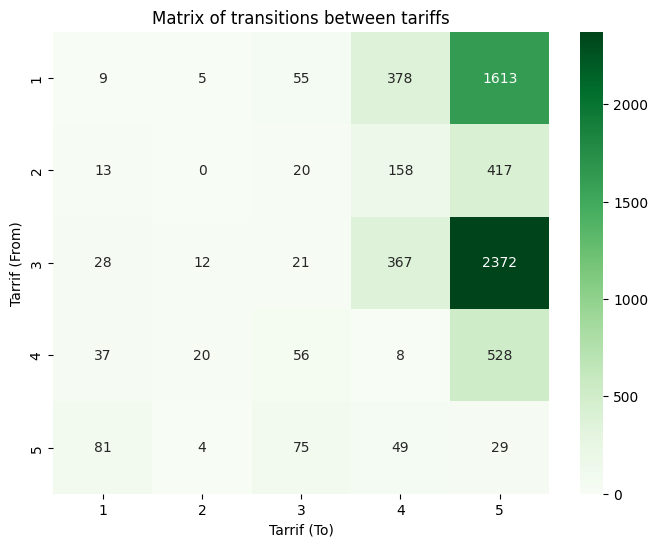

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу переходов
transition_matrix = pd.crosstab(
    index=transition_counts['FROM_TARIFF'], 
    columns=transition_counts['TO_TARIFF'],
    values=transition_counts['COUNT'], 
    aggfunc='sum'
).fillna(0)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, fmt='g', cmap='Greens')
plt.title('Matrix of transitions between tariffs')
plt.xlabel('Tarrif (To)')
plt.ylabel('Tarrif (From)')
plt.show()

In [ ]:
df['change_month'] = df['START_DTTM'].dt.to_period('M')     #changes format (yyyy-mm-dd) to (yyyy-mm)
transitions = df.dropna(subset=['PREV_TARIFF']).copy()      # delete Nan   
df


,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,PREV_TARIFF,change_month
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,NaN,2013-11
1,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,NaN,2016-02
3,2,5,2017-06-29 12:39:59,NaT,1.0,2017-06
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,NaN,2015-05
...,...,...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,NaT,5.0,2017-05
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,NaN,2017-05
12341,5988,4,2017-05-22 16:36:56,NaT,1.0,2017-05
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,NaN,2017-05


In [74]:
transitions 

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,PREV_TARIFF,change_month
1,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03
3,2,5,2017-06-29 12:39:59,NaT,1.0,2017-06
5,3,5,2017-04-14 12:01:00,NaT,1.0,2017-04
7,4,5,2017-01-09 19:27:51,NaT,3.0,2017-01
9,5,5,2017-05-08 12:40:00,NaT,1.0,2017-05
...,...,...,...,...,...,...
12335,5985,5,2017-06-17 15:00:47,NaT,4.0,2017-06
12337,5986,1,2017-06-27 17:45:07,NaT,5.0,2017-06
12339,5987,3,2017-05-23 13:07:57,NaT,5.0,2017-05
12341,5988,4,2017-05-22 16:36:56,NaT,1.0,2017-05


In [4]:
df_charges.head()


,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610


In [8]:
df_join = pd.merge(df_tariff,df_charges,how='inner',on='SUBSCRIBER_ID')
df_join.head()

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,BILL_MONTH,CHARGES
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,2016-12-01,21.132
1,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,2017-10-01,20.464
2,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,2017-06-01,23.651
3,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,2016-09-01,24.964
4,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,2017-09-01,24.012


In [ ]:
df_join.loc[df_join['BILL_MONTH']>=df_join['END_DTTM'] and df_join['BILL_MONTH'] <= df_join['END_DTTM']].sum()

np.float64(1202977.7980000002)

In [10]:
df_join.loc[df_join['BILL_MONTH']<=df_join['END_DTTM'], 'CHARGES'].sum()

np.float64(544721.031)